In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Loading the dataset
data = pd.read_excel('p3.xlsx')

# Converting Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Adding hour of day for analysis
data['Hour'] = data['Timestamp'].dt.hour

# Defining peak and off-peak hours
peak_hours = range(8, 17)  # 8 AM to 5 PM
off_peak_hours = list(range(0, 5)) + list(range(22, 24))  # 12 AM to 5 AM, 10 PM to 12 AM

# Identifying inefficiencies
# Assumption: Machines and HVAC should have lower consumption during off-peak hours
inefficiencies = []
for index, row in data.iterrows():
    hour = row['Hour']
    if hour in off_peak_hours:
        # Machines running at >50% of peak capacity during off-peak is inefficient
        if row['Machine 1 (kWh)'] > 7 or row['Machine 2 (kWh)'] > 7:
            inefficiencies.append({
                'Timestamp': row['Timestamp'],
                'Issue': 'High machine usage during off-peak',
                'Machine 1 (kWh)': row['Machine 1 (kWh)'],
                'Machine 2 (kWh)': row['Machine 2 (kWh)']
            })
        # HVAC or Lighting usage above minimal levels
        if row['HVAC (kWh)'] > 3 or row['Lighting (kWh)'] > 2:
            inefficiencies.append({
                'Timestamp': row['Timestamp'],
                'Issue': 'High HVAC/Lighting usage during off-peak',
                'HVAC (kWh)': row['HVAC (kWh)'],
                'Lighting (kWh)': row['Lighting (kWh)']
            })

# Clustering to identify consumption patterns
features = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Optimization recommendations
optimized_data = data.copy()
savings = 0
for index, row in optimized_data.iterrows():
    if row['Hour'] in off_peak_hours:
        # Reduce machine usage to minimal (2 kWh each)
        if row['Machine 1 (kWh)'] > 2:
            savings += row['Machine 1 (kWh)'] - 2
            optimized_data.at[index, 'Machine 1 (kWh)'] = 2
        if row['Machine 2 (kWh)'] > 2:
            savings += row['Machine 2 (kWh)'] - 2
            optimized_data.at[index, 'Machine 2 (kWh)'] = 2
        # Reduce HVAC to 1 kWh, Lighting to 0.5 kWh
        if row['HVAC (kWh)'] > 1:
            savings += row['HVAC (kWh)'] - 1
            optimized_data.at[index, 'HVAC (kWh)'] = 1
        if row['Lighting (kWh)'] > 0.5:
            savings += row['Lighting (kWh)'] - 0.5
            optimized_data.at[index, 'Lighting (kWh)'] = 0.5
optimized_data['Total Consumption (kWh)'] = optimized_data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)

# Calculating savings
total_baseline = data['Total Consumption (kWh)'].sum()
total_optimized = optimized_data['Total Consumption (kWh)'].sum()
percent_savings = ((total_baseline - total_optimized) / total_baseline) * 100
cost_savings = savings * 0.15  # $0.15 per kWh
carbon_savings = savings * 0.5  # 0.5 kg CO2 per kWh

# Saving results
inefficiencies_df = pd.DataFrame(inefficiencies)
inefficiencies_df.to_csv('inefficiencies.csv', index=False)
optimized_data.to_csv('optimized_data.csv', index=False)

# Plotting baseline vs optimized
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Total Consumption (kWh)'], label='Baseline')
plt.plot(optimized_data['Timestamp'], optimized_data['Total Consumption (kWh)'], label='Optimized')
plt.title('Baseline vs Optimized Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Total Consumption (kWh)')
plt.legend()
plt.savefig('consumption_plot.png')
plt.close()

print(f"Total Energy Savings: {savings:.2f} kWh")
print(f"Percentage Savings: {percent_savings:.2f}%")
print(f"Cost Savings: ${cost_savings:.2f}")
print(f"Carbon Reduction: {carbon_savings:.2f} kg CO2")

Total Energy Savings: 176.60 kWh
Percentage Savings: 10.85%
Cost Savings: $26.49
Carbon Reduction: 88.30 kg CO2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel('p3.xlsx')

# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour

# Define peak and off-peak hours
peak_hours = range(8, 17)  # 8 AM to 5 PM
off_peak_hours = list(range(0, 5)) + list(range(22, 24))  # 12 AM to 5 AM, 10 PM to 12 AM

# Identify inefficiencies
inefficiencies = []
for index, row in data.iterrows():
    hour = row['Hour']
    if hour in off_peak_hours:
        if row['Machine 1 (kWh)'] > 7 or row['Machine 2 (kWh)'] > 7:
            inefficiencies.append({
                'Timestamp': row['Timestamp'],
                'Issue': 'High machine usage during off-peak',
                'Machine 1 (kWh)': row['Machine 1 (kWh)'],
                'Machine 2 (kWh)': row['Machine 2 (kWh)']
            })
        if row['HVAC (kWh)'] > 3 or row['Lighting (kWh)'] > 2:
            inefficiencies.append({
                'Timestamp': row['Timestamp'],
                'Issue': 'High HVAC/Lighting usage during off-peak',
                'HVAC (kWh)': row['HVAC (kWh)'],
                'Lighting (kWh)': row['Lighting (kWh)']
            })

# Apply KMeans clustering to find patterns
features = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Optimize off-peak consumption
optimized_data = data.copy()
savings = 0
for index, row in optimized_data.iterrows():
    if row['Hour'] in off_peak_hours:
        if row['Machine 1 (kWh)'] > 2:
            savings += row['Machine 1 (kWh)'] - 2
            optimized_data.at[index, 'Machine 1 (kWh)'] = 2
        if row['Machine 2 (kWh)'] > 2:
            savings += row['Machine 2 (kWh)'] - 2
            optimized_data.at[index, 'Machine 2 (kWh)'] = 2
        if row['HVAC (kWh)'] > 1:
            savings += row['HVAC (kWh)'] - 1
            optimized_data.at[index, 'HVAC (kWh)'] = 1
        if row['Lighting (kWh)'] > 0.5:
            savings += row['Lighting (kWh)'] - 0.5
            optimized_data.at[index, 'Lighting (kWh)'] = 0.5

# Compute total consumption
data['Total Consumption (kWh)'] = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)
optimized_data['Total Consumption (kWh)'] = optimized_data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)

# Calculate savings
total_baseline = data['Total Consumption (kWh)'].sum()
total_optimized = optimized_data['Total Consumption (kWh)'].sum()
percent_savings = ((total_baseline - total_optimized) / total_baseline) * 100
cost_savings = savings * 0.15  # $0.15 per kWh
carbon_savings = savings * 0.5  # 0.5 kg CO2 per kWh

# Save results
inefficiencies_df = pd.DataFrame(inefficiencies)
inefficiencies_df.to_csv('inefficiencies.csv', index=False)
optimized_data.to_csv('optimized_data.csv', index=False)

# Plot energy consumption
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Total Consumption (kWh)'], label='Baseline')
plt.plot(optimized_data['Timestamp'], optimized_data['Total Consumption (kWh)'], label='Optimized')
plt.title('Baseline vs Optimized Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Total Consumption (kWh)')
plt.legend()
plt.savefig('consumption_plot.png')
plt.close()

# Print savings
print(f"Total Energy Savings: {savings:.2f} kWh")
print(f"Percentage Savings: {percent_savings:.2f}%")
print(f"Cost Savings: ${cost_savings:.2f}")
print(f"Carbon Reduction: {carbon_savings:.2f} kg CO2")


Total Energy Savings: 176.60 kWh
Percentage Savings: 10.85%
Cost Savings: $26.49
Carbon Reduction: 88.30 kg CO2


<ipython-input-3-2f2eb6c7438d>:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


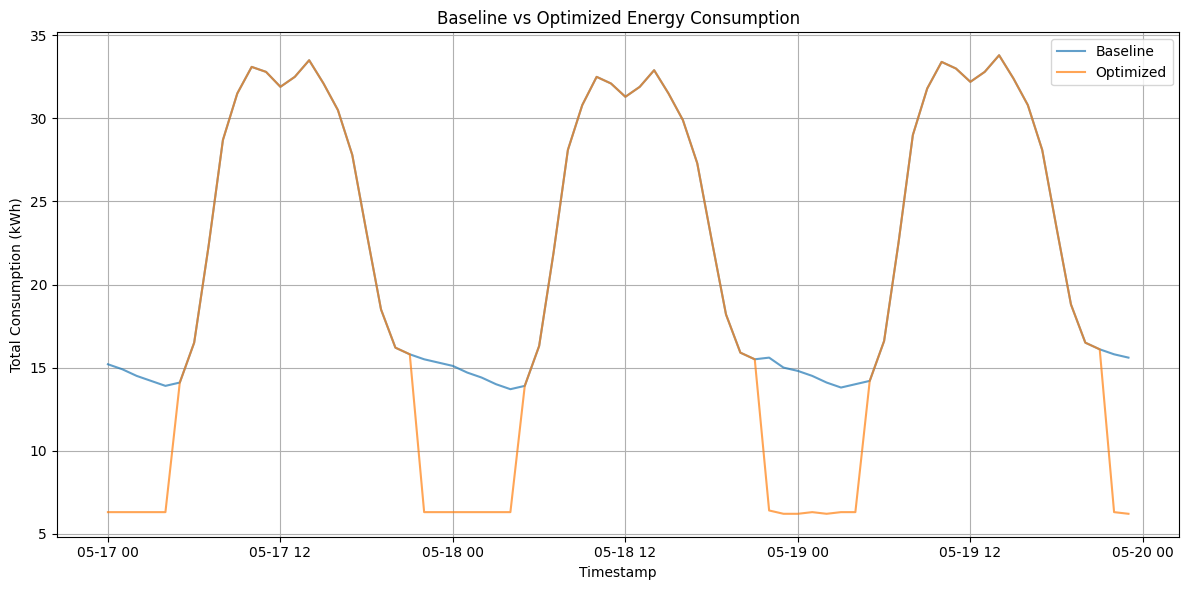

=== ENERGY OPTIMIZATION REPORT ===
Total Energy Savings: 176.60 kWh
Percentage Savings: 10.85%
Cost Savings: $26.49
Carbon Reduction: 88.30 kg CO2
KMeans Clustering Silhouette Score: 0.7231


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_excel('p3.xlsx')

# ------------------------ Data Preprocessing ------------------------
# Convert Timestamp to datetime
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')

# Drop rows with invalid timestamps
data = data.dropna(subset=['Timestamp'])

# Extract hour from timestamp
data['Hour'] = data['Timestamp'].dt.hour

# Fill missing values with median
for col in ['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Ensure numeric
    data[col].fillna(data[col].median(), inplace=True)

# ------------------------ Inefficiency Detection ------------------------
peak_hours = range(8, 17)  # 8 AM to 5 PM
off_peak_hours = list(range(0, 5)) + list(range(22, 24))  # 12 AM to 5 AM and 10 PM to 12 AM

inefficiencies = []
for index, row in data.iterrows():
    hour = row['Hour']
    if hour in off_peak_hours:
        if row['Machine 1 (kWh)'] > 7 or row['Machine 2 (kWh)'] > 7:
            inefficiencies.append({
                'Timestamp': row['Timestamp'],
                'Issue': 'High machine usage during off-peak',
                'Machine 1 (kWh)': row['Machine 1 (kWh)'],
                'Machine 2 (kWh)': row['Machine 2 (kWh)']
            })
        if row['HVAC (kWh)'] > 3 or row['Lighting (kWh)'] > 2:
            inefficiencies.append({
                'Timestamp': row['Timestamp'],
                'Issue': 'High HVAC/Lighting usage during off-peak',
                'HVAC (kWh)': row['HVAC (kWh)'],
                'Lighting (kWh)': row['Lighting (kWh)']
            })

# ------------------------ Clustering ------------------------
features = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate clustering accuracy using silhouette score
silhouette = silhouette_score(scaled_features, data['Cluster'])

# ------------------------ Optimization ------------------------
optimized_data = data.copy()
savings = 0

for index, row in optimized_data.iterrows():
    if row['Hour'] in off_peak_hours:
        if row['Machine 1 (kWh)'] > 2:
            savings += row['Machine 1 (kWh)'] - 2
            optimized_data.at[index, 'Machine 1 (kWh)'] = 2
        if row['Machine 2 (kWh)'] > 2:
            savings += row['Machine 2 (kWh)'] - 2
            optimized_data.at[index, 'Machine 2 (kWh)'] = 2
        if row['HVAC (kWh)'] > 1:
            savings += row['HVAC (kWh)'] - 1
            optimized_data.at[index, 'HVAC (kWh)'] = 1
        if row['Lighting (kWh)'] > 0.5:
            savings += row['Lighting (kWh)'] - 0.5
            optimized_data.at[index, 'Lighting (kWh)'] = 0.5

# Total consumption
data['Total Consumption (kWh)'] = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)
optimized_data['Total Consumption (kWh)'] = optimized_data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)

# ------------------------ Savings Calculations ------------------------
total_baseline = data['Total Consumption (kWh)'].sum()
total_optimized = optimized_data['Total Consumption (kWh)'].sum()
percent_savings = ((total_baseline - total_optimized) / total_baseline) * 100
cost_savings = savings * 0.15  # $0.15 per kWh
carbon_savings = savings * 0.5  # 0.5 kg CO2 per kWh

# ------------------------ Save Results ------------------------
inefficiencies_df = pd.DataFrame(inefficiencies)
inefficiencies_df.to_csv('inefficiencies.csv', index=False)
optimized_data.to_csv('optimized_data.csv', index=False)

# ------------------------ Plotting ------------------------
plt.figure(figsize=(12, 6))
plt.plot(data['Timestamp'], data['Total Consumption (kWh)'], label='Baseline', alpha=0.7)
plt.plot(optimized_data['Timestamp'], optimized_data['Total Consumption (kWh)'], label='Optimized', alpha=0.7)
plt.title('Baseline vs Optimized Energy Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Total Consumption (kWh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('consumption_plot.png')
plt.show()

# ------------------------ Output Results ------------------------
print("=== ENERGY OPTIMIZATION REPORT ===")
print(f"Total Energy Savings: {savings:.2f} kWh")
print(f"Percentage Savings: {percent_savings:.2f}%")
print(f"Cost Savings: ${cost_savings:.2f}")
print(f"Carbon Reduction: {carbon_savings:.2f} kg CO2")
print(f"KMeans Clustering Silhouette Score: {silhouette:.4f}")


In [ ]:
# Add this line to save the original data as a pickle file
data.to_pickle('original_data.pkl')

# Add this line to save the optimized data as a pickle file
optimized_data.to_pickle('optimized_data.pkl')

<ipython-input-4-8df48e7340b6>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Linear Regression -> MSE: 0.00, R²: 1.0000
Random Forest -> MSE: 0.04, R²: 0.9994
Gradient Boosting -> MSE: 0.02, R²: 0.9996
XGBoost -> MSE: 0.67, R²: 0.9898


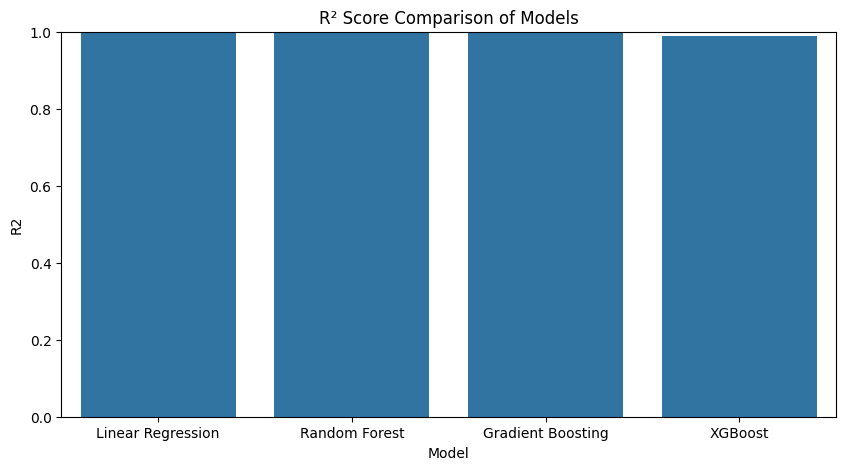

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

# Load and preprocess dataset
data = pd.read_excel('p3.xlsx')

# Handle missing values
data.fillna(method='ffill', inplace=True)

# Convert Timestamp
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour

# Total consumption
data['Total Consumption (kWh)'] = data[['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Other (kWh)']].sum(axis=1)

# Features & target
features = ['Machine 1 (kWh)', 'Machine 2 (kWh)', 'HVAC (kWh)', 'Lighting (kWh)', 'Hour']
target = 'Total Consumption (kWh)'

X = data[features]
y = data[target]

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- Linear Regression -------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ------------------- Random Forest -------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ------------------- Gradient Boosting -------------------
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# ------------------- XGBoost -------------------
xgbr = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgbr.fit(X_train, y_train)
y_pred_xgb = xgbr.predict(X_test)

# ------------------- Evaluation -------------------
def evaluate(model_name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.2f}, R²: {r2:.4f}")
    return {'Model': model_name, 'MSE': mse, 'R2': r2}

results = []
results.append(evaluate("Linear Regression", y_test, y_pred_lr))
results.append(evaluate("Random Forest", y_test, y_pred_rf))
results.append(evaluate("Gradient Boosting", y_test, y_pred_gbr))
results.append(evaluate("XGBoost", y_test, y_pred_xgb))

# ------------------- Accuracy Comparison Plot -------------------
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='R2', data=results_df)
plt.title('R² Score Comparison of Models')
plt.ylim(0, 1)
plt.savefig("model_accuracy_comparison.png")
plt.show()
